Importing required libraries

In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import joblib

Loading the dataset

In [15]:
df_aparts = pd.read_csv('apartments.csv')
df_aparts.columns

Index(['Unnamed: 0', 'title', 'location', 'bedrooms', 'bathrooms', 'price',
       'rate'],
      dtype='object')

In [16]:
df_aparts.head(5)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


Exploring the dataset

In [17]:
#Shape of the dataset, rows and columns respectively.
df_aparts.shape

(2520, 7)

In [18]:
df_aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   title       2520 non-null   object
 2   location    2144 non-null   object
 3   bedrooms    2520 non-null   int64 
 4   bathrooms   2520 non-null   int64 
 5   price       2520 non-null   object
 6   rate        2520 non-null   object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [19]:
df_aparts.drop(columns=['Unnamed: 0'])
df_aparts.columns
df_aparts.isnull().sum()

Unnamed: 0      0
title           0
location      376
bedrooms        0
bathrooms       0
price           0
rate            0
dtype: int64

# Data cleaning and wrangling

In [20]:
print(df_aparts['title'].head(10))

0      3 Bedroom Apartment / Flat to rent in Riverside
1     3 Bedroom Apartment / Flat to rent in Kileleshwa
2          3 Bedroom Apartment / Flat to rent in Nyali
3      3 Bedroom Apartment / Flat to rent in Lavington
4     1 Bedroom Apartment / Flat to rent in Kileleshwa
5    4 Bedroom Apartment / Flat to rent in Kahawa W...
6       2 Bedroom Apartment / Flat to rent in Kilimani
7      3 Bedroom Apartment / Flat to rent in Westlands
8          1 Bedroom Apartment / Flat to rent in Nyali
9       4 Bedroom Apartment / Flat to rent in Muthaiga
Name: title, dtype: object


In [21]:
import re
# Cleaning the location
df_aparts['title'] = df_aparts['title'].apply(lambda x: re.sub(r'^\d+ Bedroom Apartment / Flat to rent in ', '', x))
print(df_aparts['title'])
print('Number of unique values:', df_aparts['title'].nunique())

0           Riverside
1          Kileleshwa
2               Nyali
3           Lavington
4          Kileleshwa
            ...      
2515         Kilimani
2516            Nyali
2517    Spring Valley
2518         Muthaiga
2519        Westlands
Name: title, Length: 2520, dtype: object
Number of unique values: 12


In [22]:
df_aparts = df_aparts.drop('location', axis=1)
df_aparts.isnull().sum()
num_none_values = df_aparts.isnull().sum().sum()
print("Number of None values: ", num_none_values)

Number of None values:  0


In [23]:
#Renaming the columns
df_aparts.rename(columns={'title': 'Town'}, inplace=True)
df_aparts.rename(columns={'bedrooms': 'Bedrooms'}, inplace=True)
df_aparts.rename(columns={'bathrooms': 'Bathrooms'}, inplace=True)
df_aparts.rename(columns={'price': 'Price'}, inplace=True)
df_aparts.columns

Index(['Unnamed: 0', 'Town', 'Bedrooms', 'Bathrooms', 'Price', 'rate'], dtype='object')

In [24]:
print(df_aparts[['rate', 'Price']])

           rate     Price
0     Per Month   200 000
1     Per Month    70 000
2     Per Month    38 000
3     Per Month    80 000
4     Per Month   110 000
...         ...       ...
2515  Per Month    75 000
2516  Per Month    45 000
2517  Per Month    65 000
2518  Per Month   300 000
2519  Per Month   100 000

[2520 rows x 2 columns]


In [25]:
# Remove non-numeric characters and whitespace from the "Price" column
df_aparts['Price'] = df_aparts['Price'].str.replace('[^\d]+', '', regex=True)
# Convert the column to integers
df_aparts['Price'] = pd.to_numeric(df_aparts['Price'], errors='coerce').astype('Int64')
# Print the rate and Price columns to check the output
print(df_aparts[['rate', 'Price']])

           rate   Price
0     Per Month  200000
1     Per Month   70000
2     Per Month   38000
3     Per Month   80000
4     Per Month  110000
...         ...     ...
2515  Per Month   75000
2516  Per Month   45000
2517  Per Month   65000
2518  Per Month  300000
2519  Per Month  100000

[2520 rows x 2 columns]


In [26]:
# Drop rows with NaN values in the "Price" column
df_aparts.dropna(subset=['Price'], inplace=True)
# Print the rate and Price columns to check the output
print(df_aparts[['rate', 'Price']])

           rate   Price
0     Per Month  200000
1     Per Month   70000
2     Per Month   38000
3     Per Month   80000
4     Per Month  110000
...         ...     ...
2515  Per Month   75000
2516  Per Month   45000
2517  Per Month   65000
2518  Per Month  300000
2519  Per Month  100000

[2520 rows x 2 columns]


In [27]:
# Print the unique values for is called "Rate"
print(df_aparts['rate'].unique())

['Per Month' 'Per Day']


In [28]:
np_days = len(df_aparts[df_aparts['rate'] == 'Per Month'])
print("For Months: ", np_days)
np_months = len(df_aparts[df_aparts['rate'] == 'Per Day'])
print("For Days: ", np_months)

For Months:  2395
For Days:  125


In [33]:
df_aparts.loc[df_aparts['rate'] == 'Per Day', 'Price'] *= 30
print(df_aparts['Price'].head(10))
df_aparts = df_aparts.drop('rate', axis=1)

0     200000
1      70000
2      38000
3      80000
4     110000
5      57750
6      65000
7      78000
8    4500000
9     300000
Name: Price, dtype: int32


In [34]:
df_aparts['Bedrooms'] = df_aparts['Bedrooms'].astype(int)
df_aparts['Bathrooms'] = df_aparts['Bathrooms'].astype(int)
df_aparts['Price'] = df_aparts['Price'].astype(int)
print(df_aparts.dtypes)

Unnamed: 0     int64
Town          object
Bedrooms       int32
Bathrooms      int32
Price          int32
dtype: object


In [35]:
#check for missing values
df_aparts.isnull().sum()

Unnamed: 0    0
Town          0
Bedrooms      0
Bathrooms     0
Price         0
dtype: int64

# Visualising the data




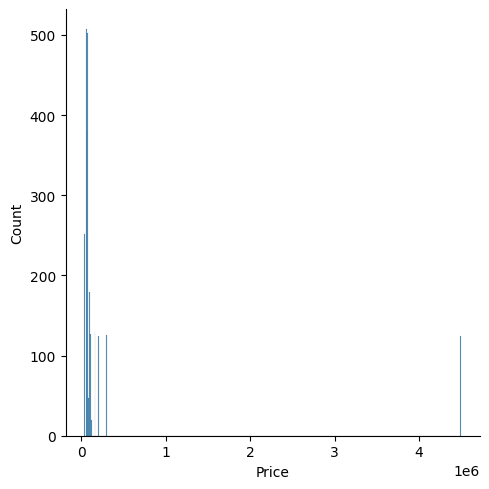

In [37]:
#Lets first check the distribution of the Price column
sns.displot(df_aparts['Price'])

<Axes: xlabel='Bedrooms', ylabel='Price'>

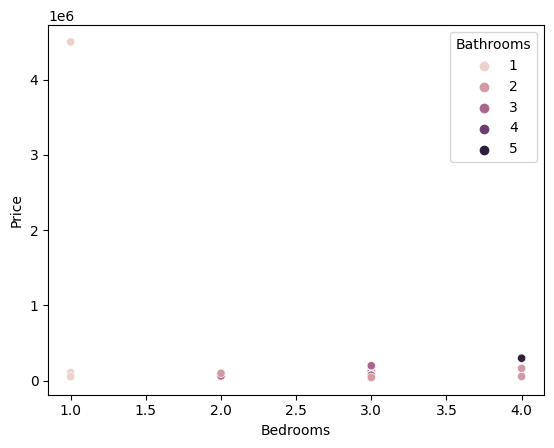

In [38]:
#scatterplot for price  and Bedrooms colored by Bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=df_aparts,hue='Bathrooms')

## Conclusion
The houses with more Bedrooms and Bathrooms are more expensive


In [39]:
df_aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   Town        2520 non-null   object
 2   Bedrooms    2520 non-null   int32 
 3   Bathrooms   2520 non-null   int32 
 4   Price       2520 non-null   int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 69.0+ KB


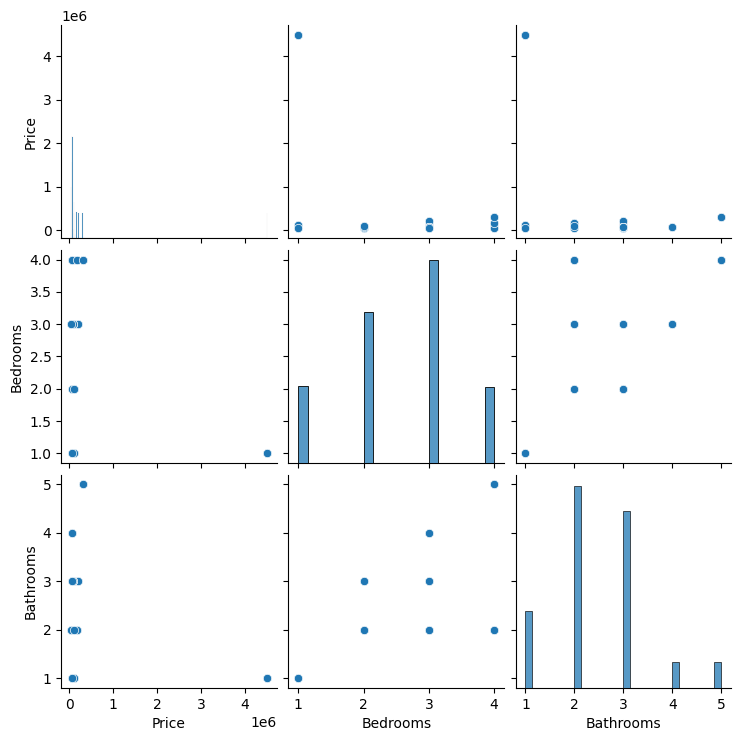

In [41]:
#generate a pairplot on price, Bedrooms, Bathrooms and sq_mtrs
sns.pairplot(df_aparts[['Price','Bedrooms','Bathrooms','Town']])

In [42]:
#The houses with more Bedrooms and bathrooms are more expensive
#The houses with more the specified day price are more expensive

In [43]:
#check for the towns
df_aparts['Town'].nunique()

12

<Axes: xlabel='Town'>

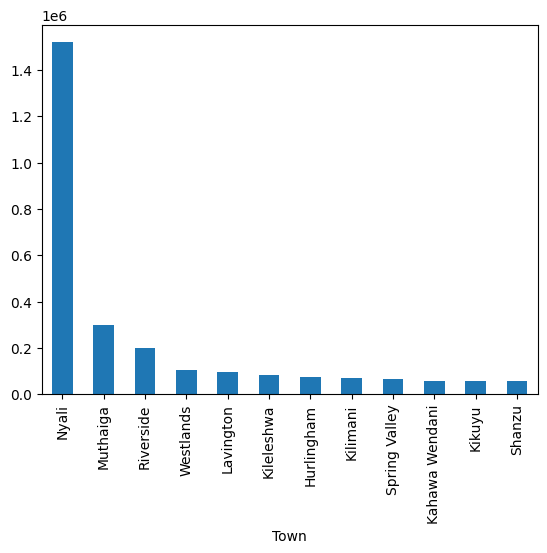

In [45]:
#grouby the towns and get the mean price,plot it
df_aparts.groupby('Town')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

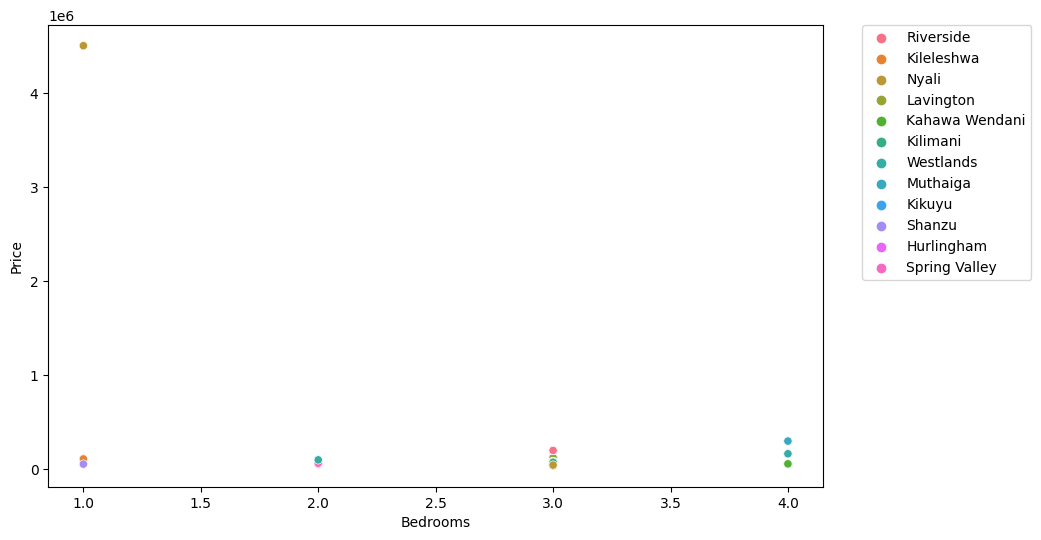

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bedrooms',y='Price',data=df_aparts,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

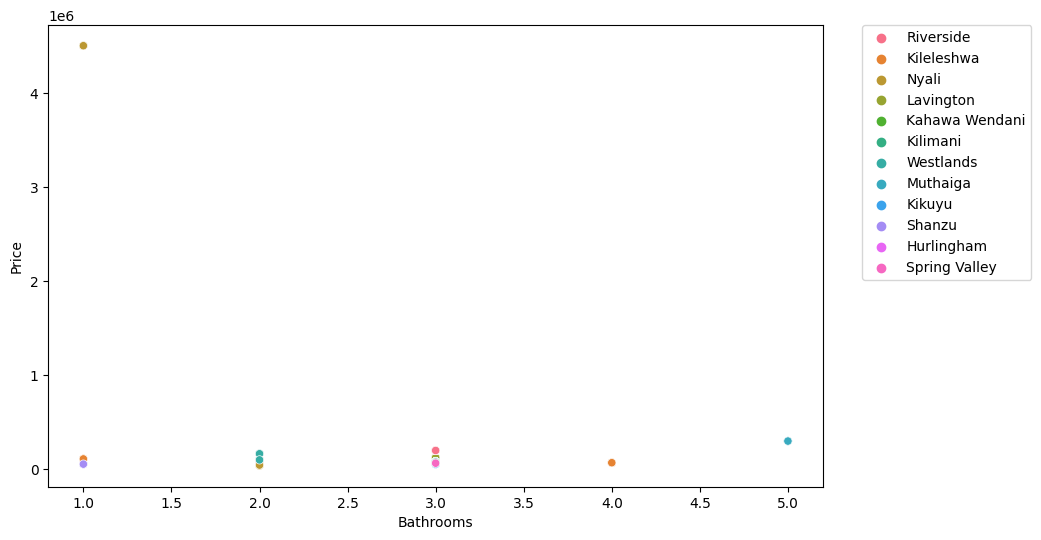

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bathrooms',y='Price',data=df_aparts,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [48]:
#Lets check the houses with the most bedrooms
df_aparts[df_aparts['Bedrooms']==df_aparts['Bedrooms'].max()]

,Unnamed: 0,Town,Bedrooms,Bathrooms,Price
5,5,Kahawa Wendani,4,2,57750
9,9,Muthaiga,4,5,300000
11,11,Westlands,4,2,165000
27,27,Kahawa Wendani,4,2,57750
30,30,Muthaiga,4,5,300000
...,...,...,...,...,...
2489,2489,Westlands,4,2,165000
2504,2504,Kahawa Wendani,4,2,57750
2507,2507,Muthaiga,4,5,300000
2509,2509,Westlands,4,2,165000


# Set features and labels

In [50]:
X = df_aparts[["Bedrooms", "Bathrooms","Town"]]
y = df_aparts[["Price"]]

# Define the model and train it

In [51]:
# Extract the numerical features and categorical feature
X_num = df_aparts[["Bedrooms", "Bathrooms"]]
X_cat = df_aparts[["Town"]]

In [52]:
# Create an instance of the OneHotEncoder class and fit it to the categorical feature
ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder()

In [53]:
# Transform the categorical feature using the fitted OneHotEncoder
X_cat_encoded = ohe.transform(X_cat).toarray()

In [54]:
# Combine the numerical and encoded categorical features
X = np.concatenate((X_num, X_cat_encoded), axis=1)
y = df_aparts[["Price"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the regression model using the training data
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

# Prediction and accuracy

In [55]:
#Predictions using the testing set 
y_pred = clf.predict(X_test)

# #Example of few predictions
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# five_pred= clf.predict(X_test)[:5]

# five_pred

In [56]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)


(504, 14)
(504, 1)
(504,)


In [57]:
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# str(y_test[:5])

In [58]:
# #Checking the accuracy of the model using MSE,MAE and R-squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R-squared score: ', r2_score(y_test, y_pred))


Mean squared error:  26488479.482676066
Root Mean Squared error:  5146.695977292235
Mean absolute error:  2121.446376127967
R-squared score:  0.9999688034903965


In [60]:
# trying new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3, loss="squared_error"))


In [61]:
#Checking the accuracy of a model
clf.fit(X_train, y_train)
forestPred = clf.predict(X_test)
forestScores = clf.score(X_test, y_test)
forestScores

e:\Documents\Subjects\Year 3\SUMMATIVES\AI\HousingModelKenya\SUMMATIVE_AI_Group17_KenyaHousing\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.47105391795592877

In [62]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

5146.695977292235

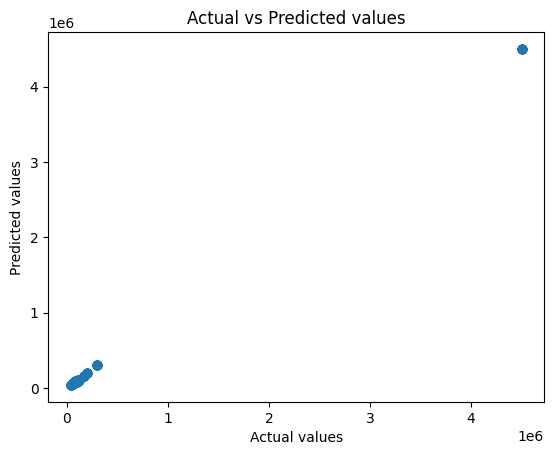

In [63]:
#using a scatter plot to visualize how well the model is perfoming
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


In [57]:
# from sklearn.model_selection import cross_val_score
#  #Cross-validate the model
#  #Perform cross-validation on the model
# scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)

#  # Display the cross-validation scores
# print('Cross-Validation Scores:', rmse_scores)
# print('Mean:', rmse_scores.mean())
# print('Standard deviation:', rmse_scores.std())


In [ ]:
joblib.dump(clf, 'house_price_prediction.joblib')